<a href="https://colab.research.google.com/github/sssuixin/SHAPE-Final-Project/blob/main/Fire_From_Space_Australia_MAPS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import pandas package
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import dataset: "Fire From Space: Australia"
Wildfires = pd.read_csv("sample_data/Wildfires.csv")

Wildfires

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight
0,-42.69706,147.70634,333.6,0.57,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,293.4,4.0,D
1,-42.26889,147.31104,336.2,0.39,0.44,2019-10-01,336,N,VIIRS,n,1.0NRT,296.9,3.9,D
2,-40.85202,145.38068,327.9,0.46,0.47,2019-10-01,336,N,VIIRS,n,1.0NRT,295.3,3.7,D
3,-42.39329,147.47144,346.9,0.38,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,294.2,6.2,D
4,-42.69701,147.70584,334.1,0.56,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,293.5,4.1,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
956252,-32.66628,122.15253,306.9,0.39,0.44,2020-01-11,1630,N,VIIRS,n,1.0NRT,288.6,0.8,N
956253,-32.58616,123.39582,299.0,0.51,0.41,2020-01-11,1630,N,VIIRS,n,1.0NRT,287.4,0.7,N
956254,-33.37853,115.94735,309.7,0.40,0.60,2020-01-11,1630,N,VIIRS,n,1.0NRT,291.7,1.0,N
956255,-33.21827,115.75078,300.2,0.49,0.65,2020-01-11,1806,N,VIIRS,n,1.0NRT,290.2,1.1,N


In [ ]:

import folium

# Define a map
map = folium.Map()

# Australia's latitude and longitude values
latitude = -25.274
longitude = 133.775

# Create Australia's map
aus_map = folium.Map(location = [latitude, longitude], zoom_start = 4, tiles = "Stamen Terrain")

# Graph the first 100 fires(Just demonstration, we have to shorten the scope)
limit = 1000
data = Wildfires.iloc[0:limit, :]

# Instantiate a feature group for the fires in the dataframe
fires = folium.map.FeatureGroup()

# Loop through the first 100 fires and add each to the incidents feature group.
for lat, lng, in zip(Wildfires.latitude, data.longitude):
  fires.add_child(folium.CircleMarker([lat, lng], radius = 7, color = "yellow", fill = True,\
                                          fill_color = "red", fill_opacity = 0.4))

# Add pop-up text (Brightness number) to each marker on the map
latitudes = list(data.latitude)
longitudes = list(data.longitude)
labels = list(data.bright_ti4)

for lat, lng, label in zip(latitudes, longitudes, labels):
  folium.Marker([lat, lng], popup = label).add_to(aus_map)

# Add fires to map. And display
aus_map.add_child(fires)

<ipython-input-15-037421306994>:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('Wistia')


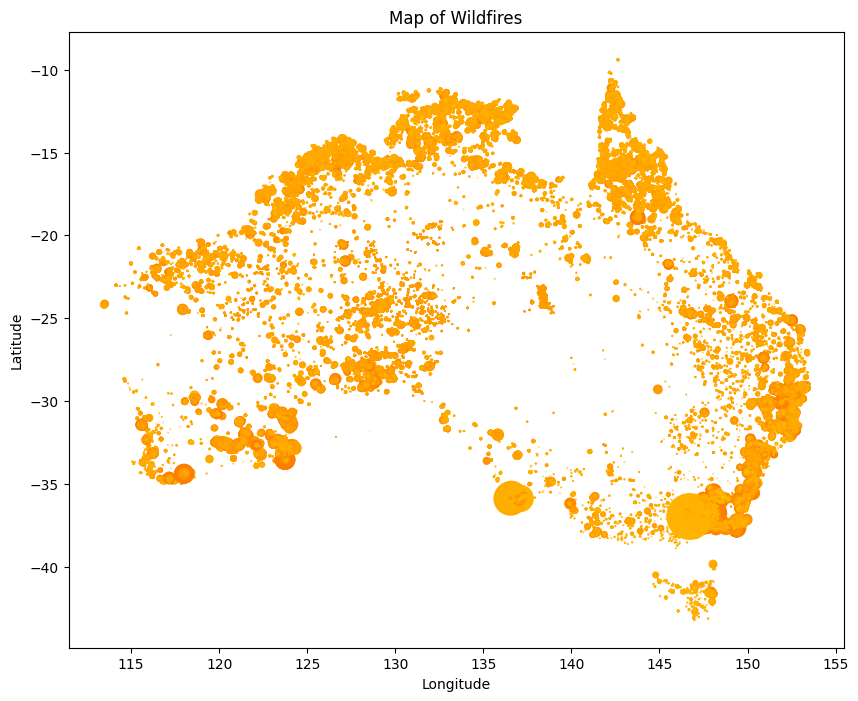

In [ ]:
cm = plt.cm.get_cmap('Wistia')
plt.figure(figsize=(10,8))
plt.scatter(Wildfires.longitude, Wildfires.latitude, s=Wildfires.frp/10, c=Wildfires.bright_ti5, cmap=cm)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Map of Wildfires")
plt.show()

In [ ]:
Wildfires.acq_time.nunique()

96

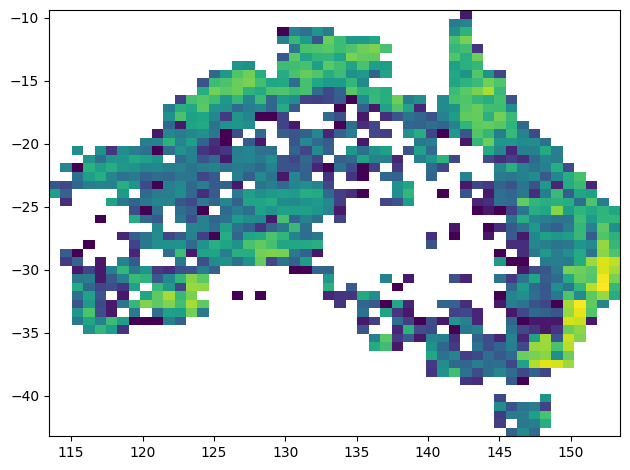

In [ ]:
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
fig, ax = plt.subplots(tight_layout=True)
hist = ax.hist2d(Wildfires.longitude, Wildfires.latitude, bins=50, norm=colors.LogNorm())
plt.show()

In [ ]:
Filter = Wildfires.longitude<129
WesternAustralia=Wildfires.loc[Filter]
Filter1=Wildfires.latitude>-26
Filter2=Wildfires.longitude>129
Filter3=Wildfires.longitude<139
NorthernTerritory=Wildfires.loc[Filter1&Filter2&Filter3]
Filter4=Wildfires.latitude<-26
Filter5=Wildfires.longitude<141
SouthAustralia=Wildfires.loc[Filter4&Filter2&Filter5]
Filter6=Wildfires.longitude>139
Filter7=Wildfires.latitude>-29
Filter8=Wildfires.longitude>141
Queensland=Wildfires.loc[(Filter6&Filter5&Filter4)|(Filter7&Filter8)]
Filter9=Wildfires.latitude>-45
Filter10=Wildfires.latitude<-40
Tasmania=Wildfires.loc[Filter9&Filter10]
Filter11=Wildfires.latitude<-29
Filter12=-177.582*Wildfires.longitude-184.019*Wildfires.latitude>-19731.729
NewSouthWales=Wildfires.loc[Filter11&Filter8*Filter12]
Filter13=-177.582*Wildfires.longitude-184.019*Wildfires.latitude<-19731.729
Filter14=Wildfires.latitude>-40
Victoria=Wildfires.loc[Filter13&Filter8&Filter14]

#| for or, & for and, and ~ for not

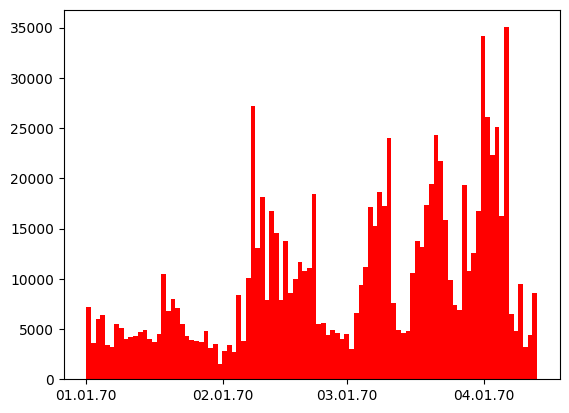

In [ ]:
import matplotlib.dates as mdates
fig, ax = plt.subplots(1,1)
ax.hist(Wildfires.acq_date, bins=96, color='red')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m.%d.%y'))
plt.show()

In [ ]:
Wildfires.acq_date.nunique()

103

In [ ]:
Wildfires["acq_date"] = pd.to_datetime(Wildfires.acq_date)

In [ ]:
Wildfires.corr()

<ipython-input-22-ea6baf04ad99>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Wildfires.corr()


,latitude,longitude,bright_ti4,scan,track,acq_time,bright_ti5,frp
latitude,1.000000,-0.387443,0.134567,0.031505,0.093681,-0.229146,0.230467,-0.068471
longitude,-0.387443,1.000000,-0.195861,-0.050957,-0.151615,0.102090,-0.284327,-0.052351
bright_ti4,0.134567,-0.195861,1.000000,-0.039062,-0.012238,-0.721616,0.673757,0.288359
scan,0.031505,-0.050957,-0.039062,1.000000,0.531226,-0.020439,-0.073096,0.019758
track,0.093681,-0.151615,-0.012238,0.531226,1.000000,-0.089005,-0.111640,-0.014334
acq_time,-0.229146,0.102090,-0.721616,-0.020439,-0.089005,1.000000,-0.632816,-0.222458
bright_ti5,0.230467,-0.284327,0.673757,-0.073096,-0.111640,-0.632816,1.000000,0.436553
frp,-0.068471,-0.052351,0.288359,0.019758,-0.014334,-0.222458,0.436553,1.000000


In [ ]:
from statsmodels.formula.api import ols
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
model = ols("frp ~ latitude + longitude + bright_ti4", Wildfires).fit()
model.params

Intercept    -184.306360
latitude       -0.711101
longitude      -0.176831
bright_ti4      0.615345
dtype: float64

In [ ]:
RandomFires=Wildfires.sort_values("scan")

In [ ]:
Train = RandomFires[:800000]
Valid = RandomFires[800000:850000]
Test = RandomFires[850000:]

In [ ]:
Train

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight
610658,-32.81680,150.64465,332.1,0.32,0.55,2019-12-18,1536,N,VIIRS,n,1.0NRT,295.3,2.3,N
412525,-33.34879,150.51878,305.5,0.32,0.55,2019-12-02,1536,N,VIIRS,n,1.0NRT,283.7,1.1,N
412526,-33.34851,150.51498,298.5,0.32,0.55,2019-12-02,1536,N,VIIRS,n,1.0NRT,283.6,0.5,N
412527,-33.34825,150.51126,300.5,0.32,0.55,2019-12-02,1536,N,VIIRS,n,1.0NRT,282.8,0.5,N
412528,-33.34449,150.53105,308.2,0.32,0.55,2019-12-02,1536,N,VIIRS,n,1.0NRT,284.3,0.6,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837406,-37.54475,149.28352,297.2,0.55,0.43,2020-01-01,1436,N,VIIRS,n,1.0NRT,285.9,2.0,N
837405,-37.53129,149.30766,351.9,0.55,0.43,2020-01-01,1436,N,VIIRS,n,1.0NRT,289.6,7.4,N
837404,-37.52999,149.30153,314.1,0.55,0.43,2020-01-01,1436,N,VIIRS,n,1.0NRT,287.3,7.4,N
837403,-37.52990,149.28154,335.7,0.55,0.43,2020-01-01,1436,N,VIIRS,n,1.0NRT,288.3,5.5,N


In [ ]:
model1 = ols("frp ~ latitude + longitude", Train).fit()
model2 = ols("frp ~ latitude + longitude + bright_ti4", Train).fit()

model2.params

Intercept    -189.980324
latitude       -0.694440
longitude      -0.122050
bright_ti4      0.608686
dtype: float64

In [ ]:
predict1 = model1.predict(Valid)
predict2 = model2.predict(Valid)

In [ ]:
predictions = pd.DataFrame({"Actual": Valid.frp, "Model1_pred": predict1, "Model2_pred":predict2})
predictions.corr()

,Actual,Model1_pred,Model2_pred
Actual,1.000000,0.159805,0.364611
Model1_pred,0.159805,1.000000,0.297543
Model2_pred,0.364611,0.297543,1.000000


In [ ]:
SSE = ((predict1 - Valid.frp)**2).sum()
MSE = SSE/len(predict1)
MSE

3201.5399000572665

In [ ]:
SSE = ((predict2 - Valid.frp)**2).sum()
MSE = SSE/len(predict2)
MSE

2898.177614035799

In [ ]:
Wildfires.value_counts("longitude", "latitude")

longitude
150.21469    0.000018
150.31027    0.000018
150.13814    0.000017
152.30038    0.000016
152.25018    0.000016
               ...   
134.38264    0.000001
134.38263    0.000001
134.38258    0.000001
134.38257    0.000001
153.45218    0.000001
Length: 614145, dtype: float64

In [ ]:
Wildfires.daynight

0         D
1         D
2         D
3         D
4         D
         ..
956252    N
956253    N
956254    N
956255    N
956256    N
Name: daynight, Length: 956257, dtype: object